In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# Import Binary Alpha Digits

In [2]:
import scipy.io
datafile = scipy.io.loadmat('../../data/binaryalphadigs.mat')

### Explore and Visualize

In [3]:
print(datafile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])


In [4]:
def plot_character(x, label, ax):
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(label)

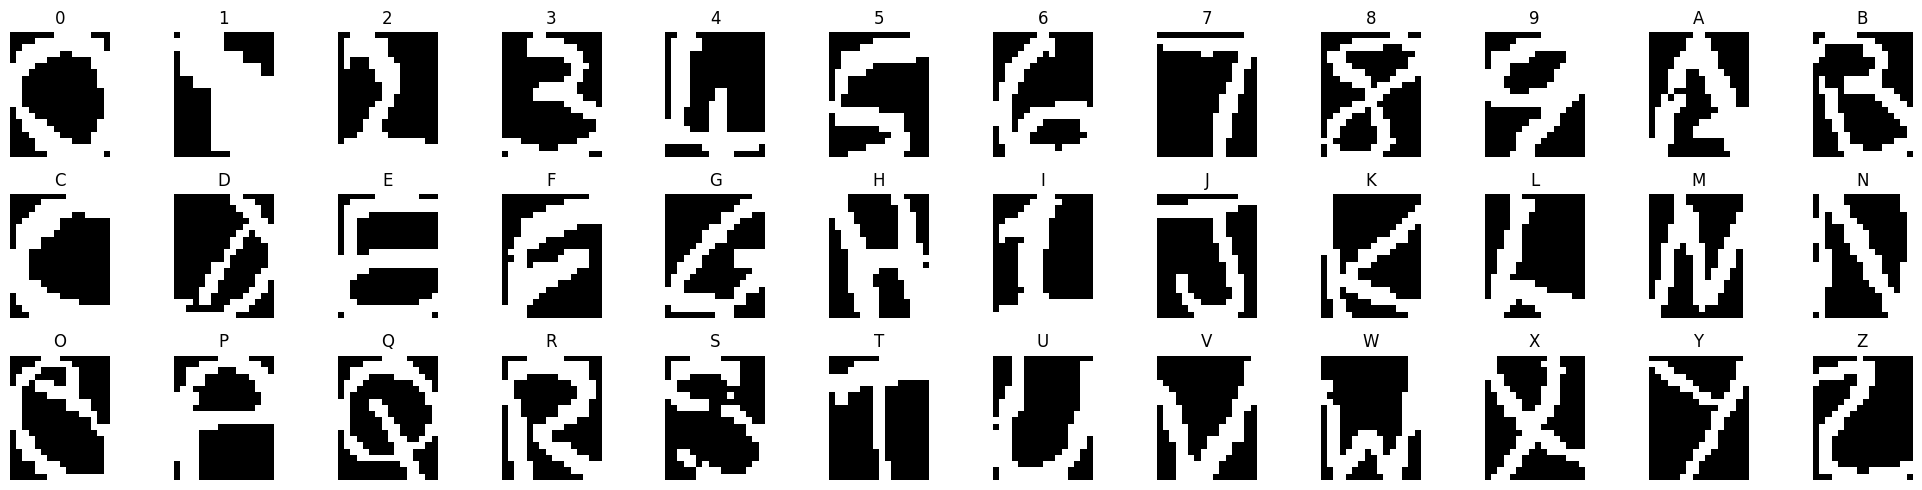

In [5]:
fig, axs = plt.subplots(3, 12, figsize=(20, 5))
for i in range(3):
    for j in range(12):
        index_to_plot = np.random.choice(range(39))
        plot_character(datafile['dat'][12*i+j, index_to_plot], datafile['classlabels'][0][12*i+j][0], axs[i, j])
plt.tight_layout()

# RBM

### RBM class

In [6]:
import sys
sys.path.append('..')

from rbm import RBM
from load_data import lire_alpha_digits

In [7]:
rbm_model = RBM(X=lire_alpha_digits(['A', 'E', '4']), q=256)

### Training the RBM

Epoch 0: error = 0.4264
Epoch 500: error = 0.0395
Epoch 1000: error = 0.0183
Epoch 1500: error = 0.0099
Epoch 2000: error = 0.0074
Epoch 2500: error = 0.0058
Epoch 3000: error = 0.0052
Epoch 3500: error = 0.0042
Epoch 4000: error = 0.004
Epoch 4500: error = 0.0031
Epoch 4999: error = 0.0032


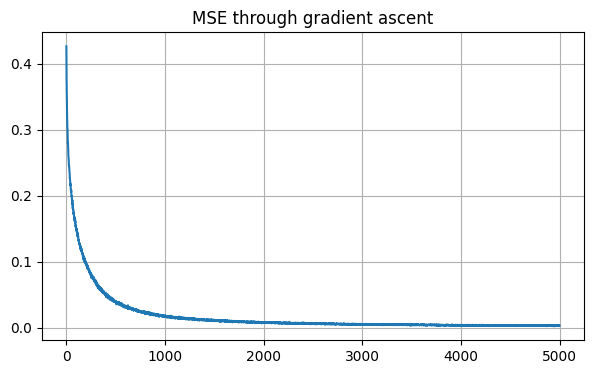

In [8]:
errors = rbm_model.train_RBM(5000, learning_rate=1e-3, batch_size=32, plot_errors=True)

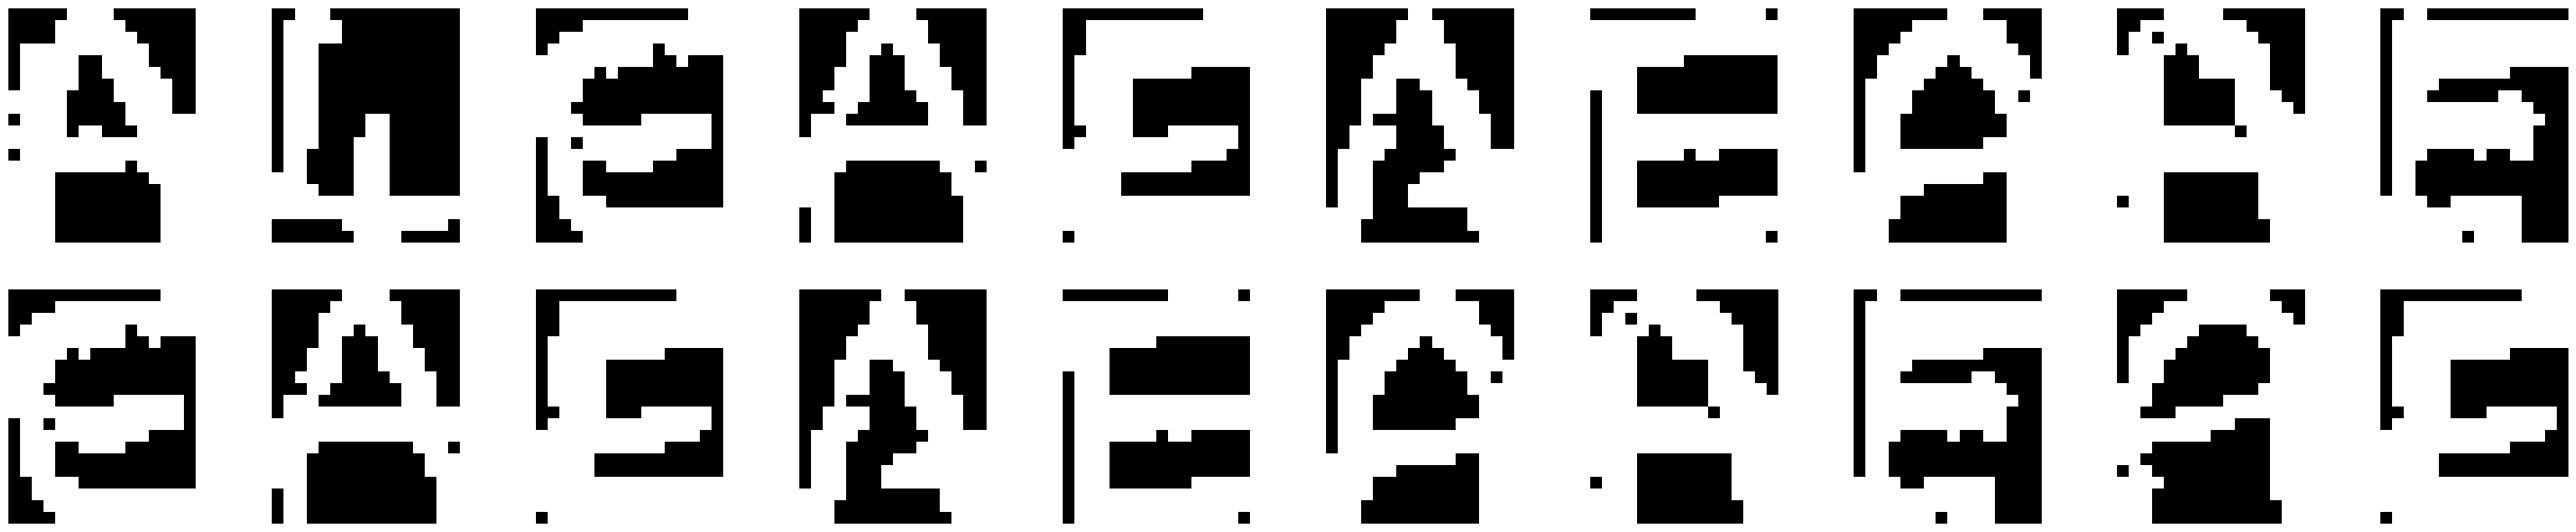

In [9]:
generated_images = rbm_model.generer_image_RBM(1000, 20, ncols=10)